In [40]:
import tensorflow as tf
from keras.datasets import mnist

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

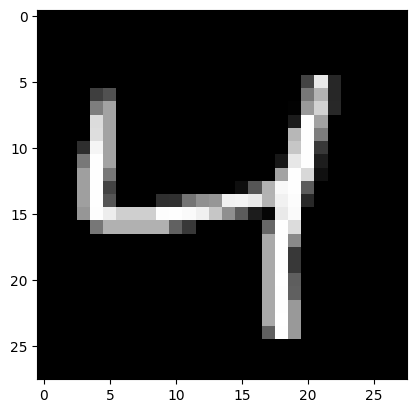

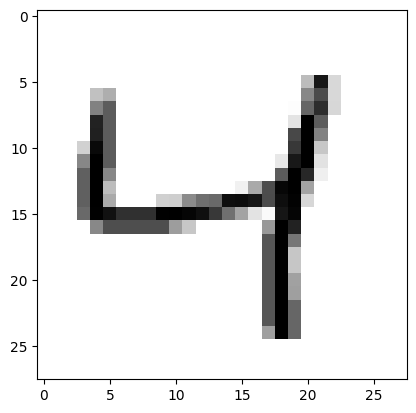

In [42]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])
plt.show()
plt.imshow(X_train[2], cmap=plt.cm.binary)

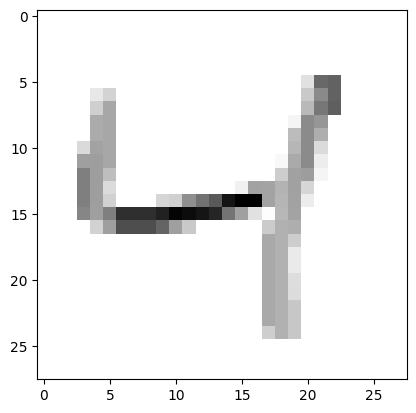

In [44]:
X_train = tf.keras.utils.normalize(X_train, axis=1) 
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[2], cmap=plt.cm.binary)

In [47]:
import tensorflow as tf
import tensorflow.keras.layers  as KL
import tensorflow.keras.models  as KM
## Model
inputs = KL.Input(shape=(28, 28, 1))
c = KL.Conv2D(32, (3, 3), padding="valid", activation=tf.nn.relu)(inputs)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(64, (3, 3), padding="valid", activation=tf.nn.relu)(d)
m = KL.MaxPool2D((2, 2), (2, 2))(c)
d = KL.Dropout(0.5)(m)
c = KL.Conv2D(128, (3, 3), padding="valid", activation=tf.nn.relu)(d)
f = KL.Flatten()(c)
outputs = KL.Dense(10, activation=tf.nn.softmax)(f)
model = KM.Model(inputs, outputs)
# model.summary()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [46]:
model.fit(X_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/5

1875/1875 [==============================] - 13s 7ms/step - loss: 0.2645 - accuracy: 0.9173
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0938 - accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0753 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0628 - accuracy: 0.9808
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0279 - accuracy: 0.9908
Test Loss: 0.027872668579220772 - Test Acc: 0.9908000230789185


In [49]:
print("Test Loss: {0} - Test Acc: {1}".format(test_loss*100, test_acc*100))

Test Loss: 2.787266857922077 - Test Acc: 99.08000230789185
